In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime,timedelta
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
data=pd.read_excel('Flight_Fare.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.size

117513

In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.describe(include=['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

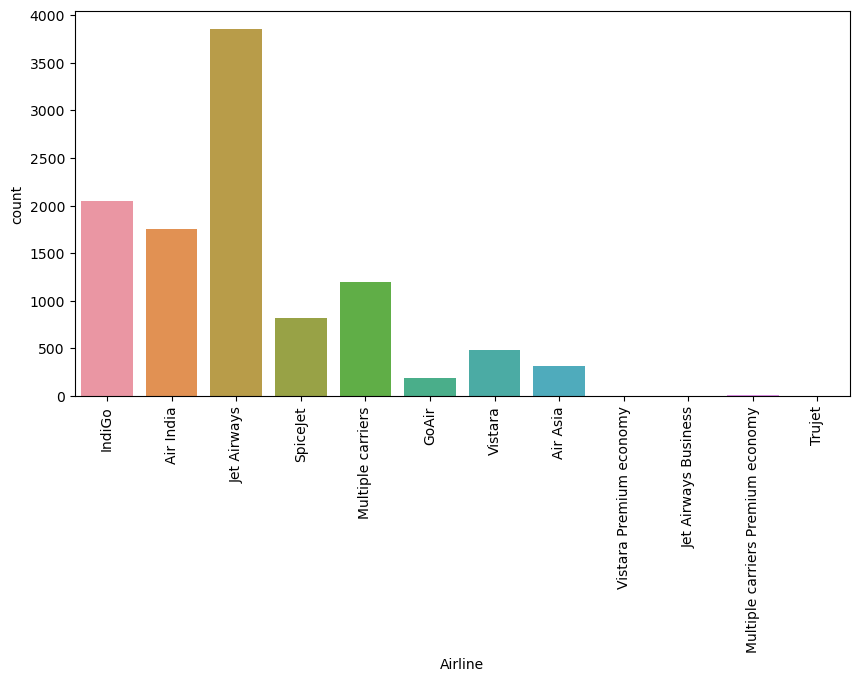

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Airline',data=data)
plt.xticks(rotation=90)

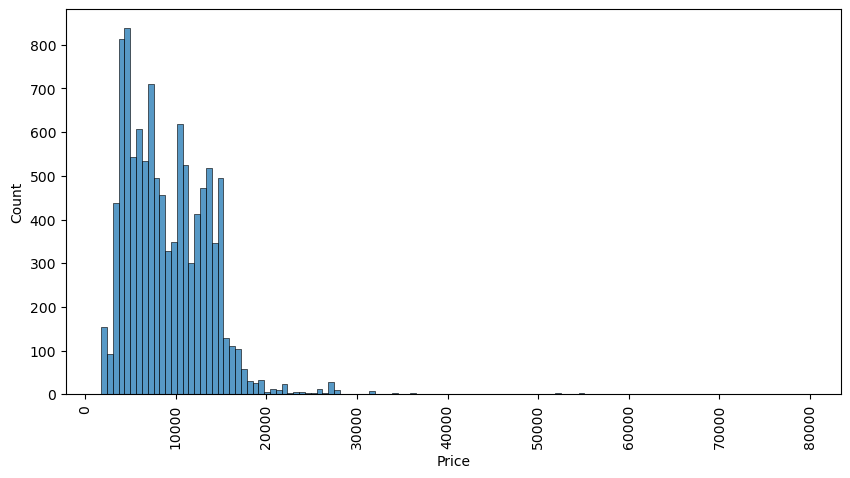

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(x='Price',data=data)
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

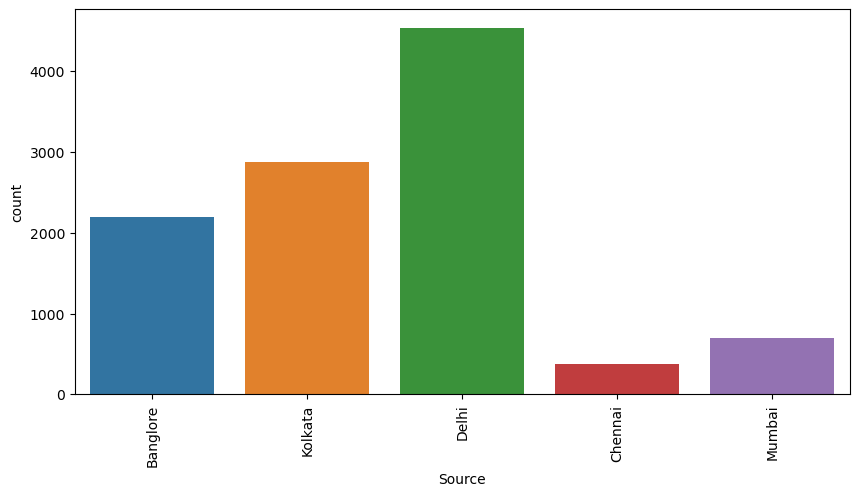

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='Source',data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

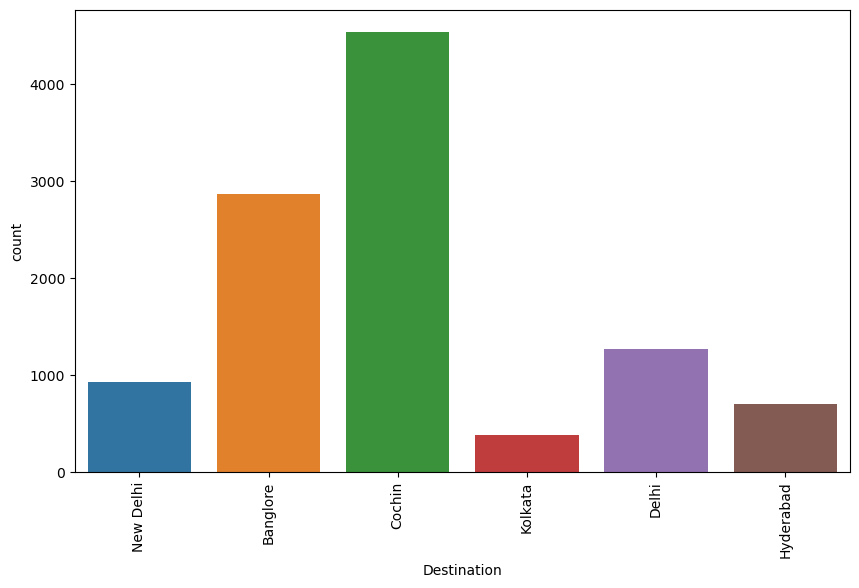

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x="Destination",data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

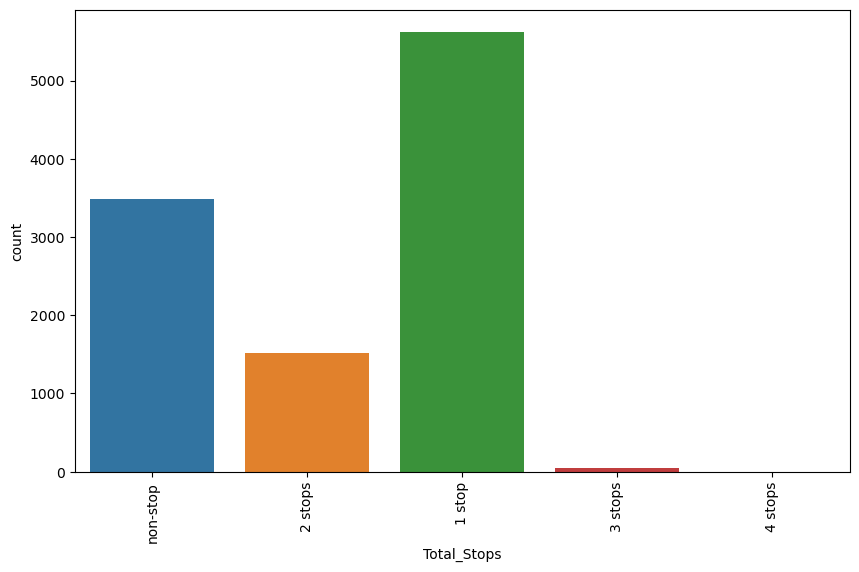

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x="Total_Stops",data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

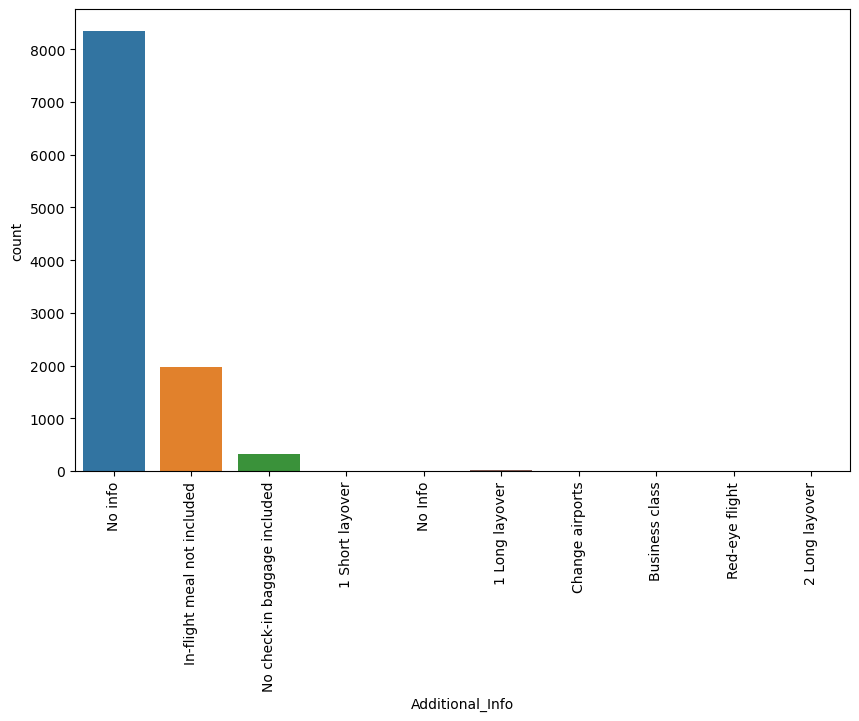

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x="Additional_Info",data=data)
plt.xticks(rotation=90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000'),
  Text(70000.0, 0, '70000'),
  Text(80000.0, 0, '80000'),
  Text(90000.0, 0, '90000')])

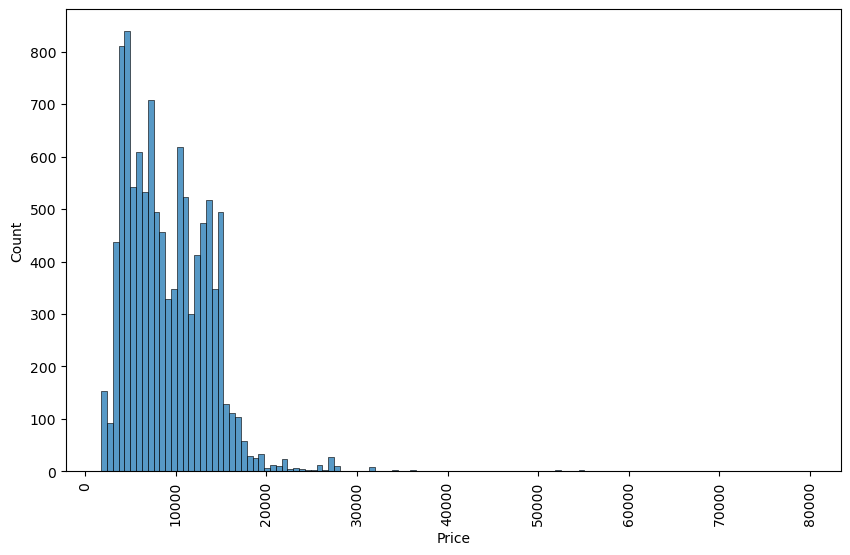

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(x="Price",data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

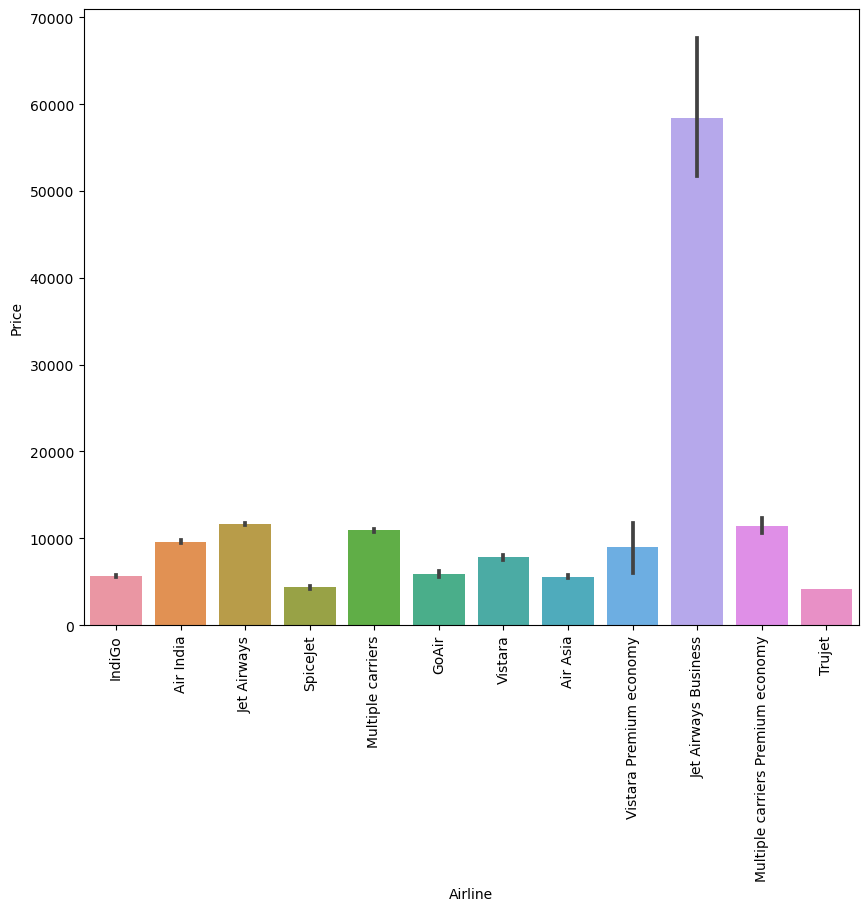

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x='Airline',y='Price',data=data)
plt.xticks(rotation=90)

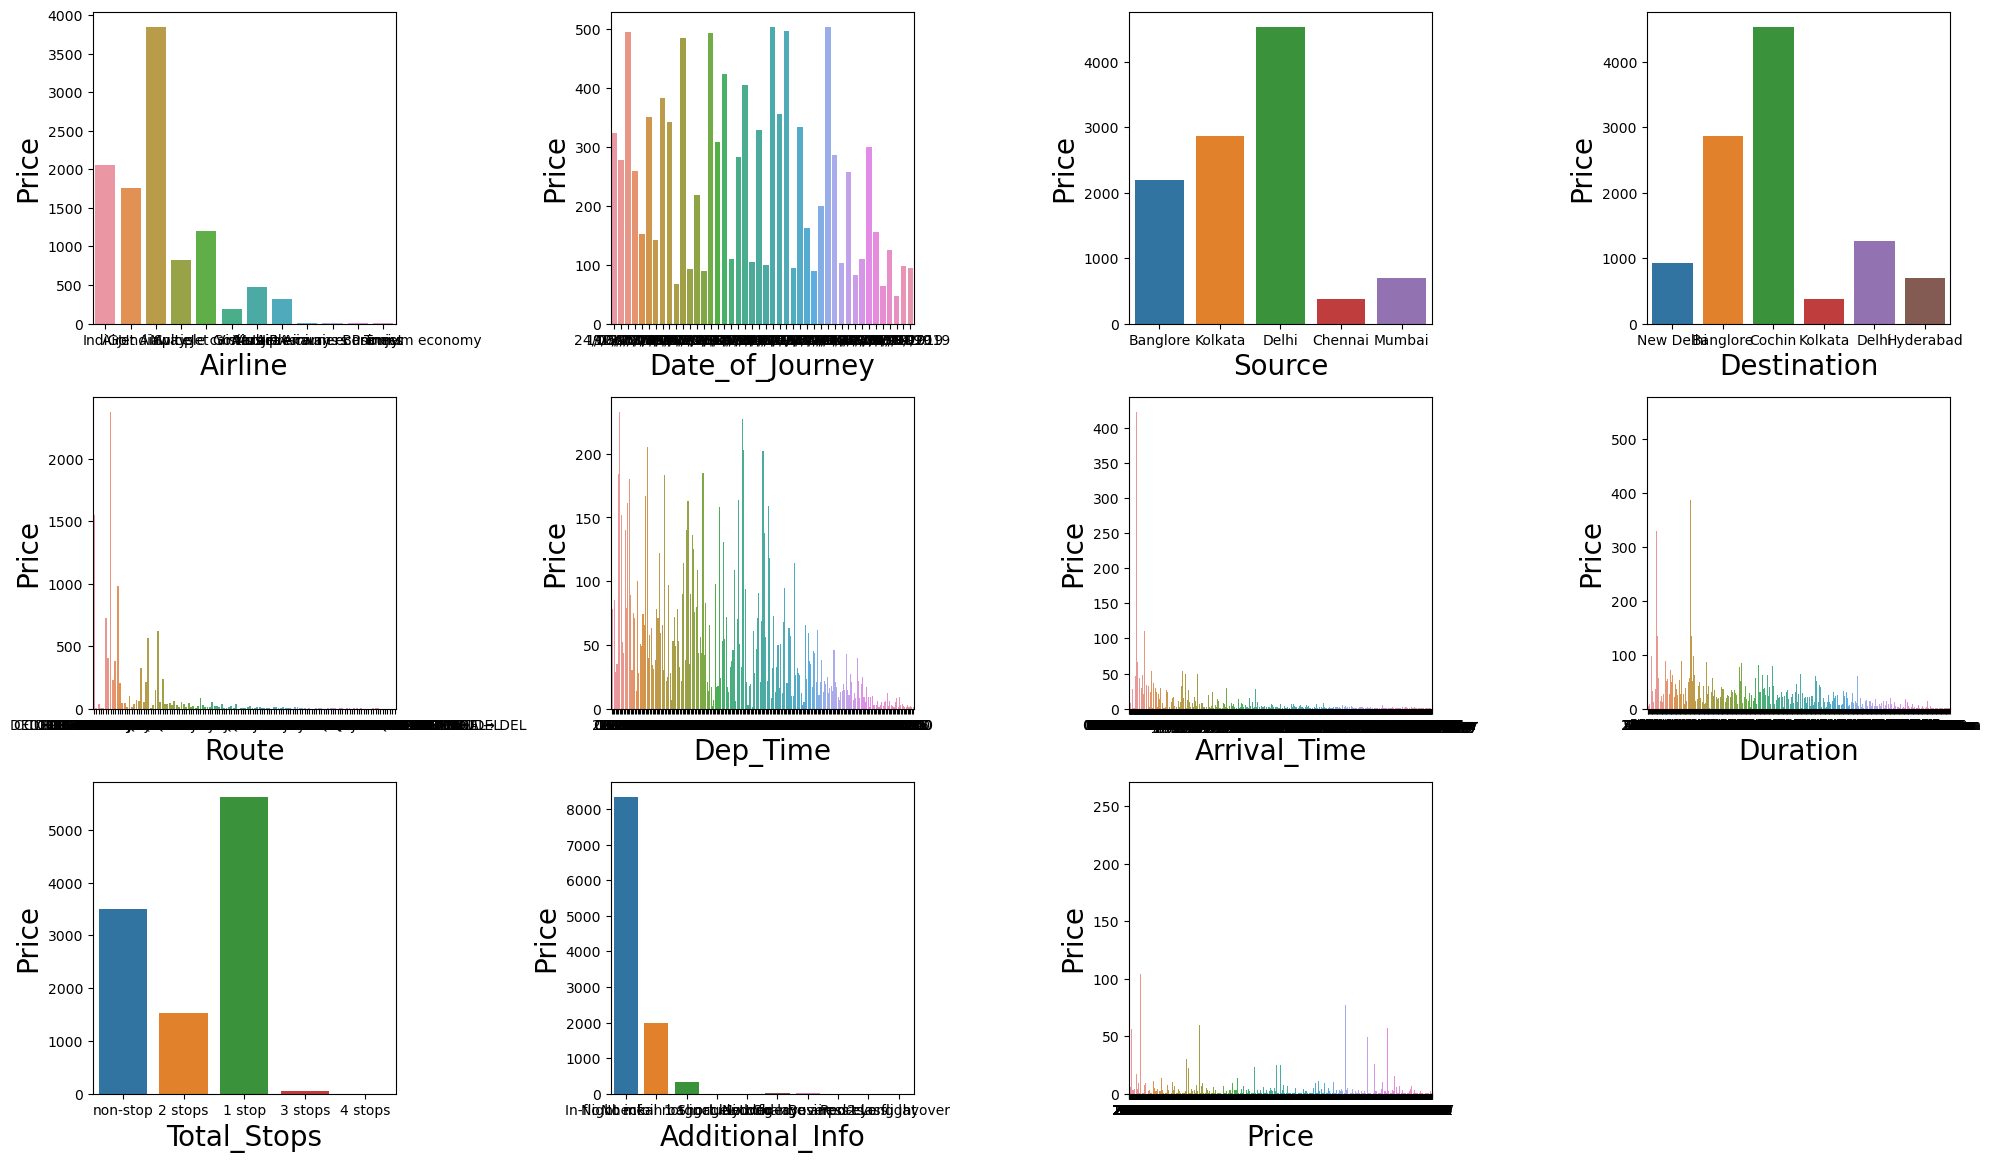

In [18]:
plt.figure(figsize=(20,15))
plotnumber=1
for Airline in data.columns:
    if plotnumber<20:
        ax=plt.subplot(4,4,plotnumber)
        sns.countplot(x=data[Airline])
        plt.xlabel(Airline,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Shape of your Data Set loaded: (10683, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix data quality issues automatically, import FixDQ from autoviz...
    Alert: Dropping 220 duplicate rows can sometimes cause column data types to change to object. Double-check!


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Airline,object,0.000000,0,nan,nan,"4 rare categories: ['Multiple carriers Premium economy', 'Jet Airways Business', 'Vistara Premium economy', 'Trujet']. Group them into a single category or drop the categories."
Date_of_Journey,object,0.000000,0,nan,nan,12 rare categories: Too many to list. Group them into a single category or drop the categories.
Source,object,0.000000,0,nan,nan,No issue
Destination,object,0.000000,0,nan,nan,No issue
Route,object,0.009557,1,nan,nan,"1 missing values. Impute them with mean, median, mode, or a constant value such as 123., 114 rare categories: Too many to list. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,, high cardinality with 128 unique values: Use hash encoding or embedding to reduce dimension."
Dep_Time,object,0.000000,2,nan,nan,"195 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 222 unique values: Use hash encoding or embedding to reduce dimension."
Arrival_Time,object,0.000000,12,nan,nan,"1335 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 1343 unique values: Use hash encoding or embedding to reduce dimension."
Duration,object,0.000000,3,nan,nan,"357 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 368 unique values: Use hash encoding or embedding to reduce dimension."
Total_Stops,object,0.009557,0,nan,nan,"1 missing values. Impute them with mean, median, mode, or a constant value such as 123., 2 rare categories: ['3 stops', '4 stops']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
Additional_Info,object,0.000000,0,nan,nan,"7 rare categories: ['1 Long layover', 'Change airports', 'Business class', 'No Info', '1 Short layover', 'Red-eye flight', '2 Long layover']. Group them into a single category or drop the categories."


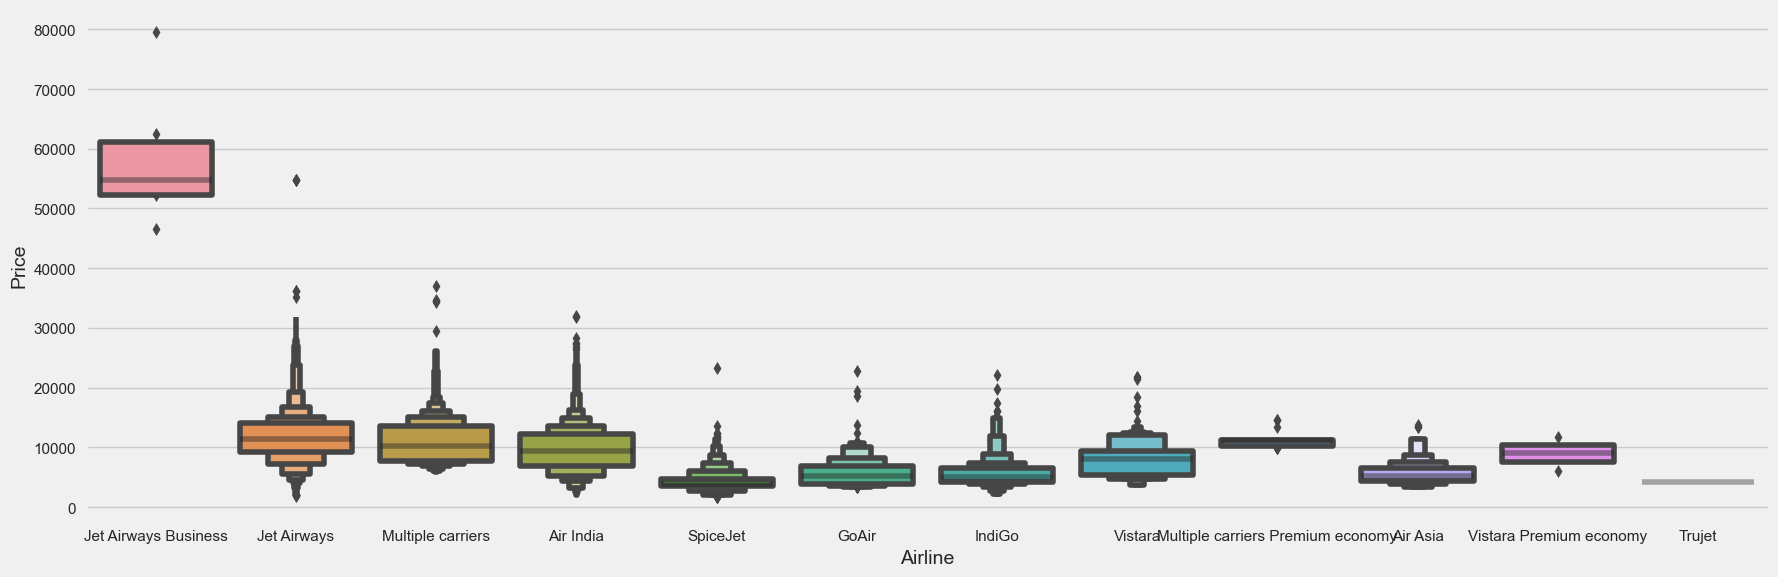

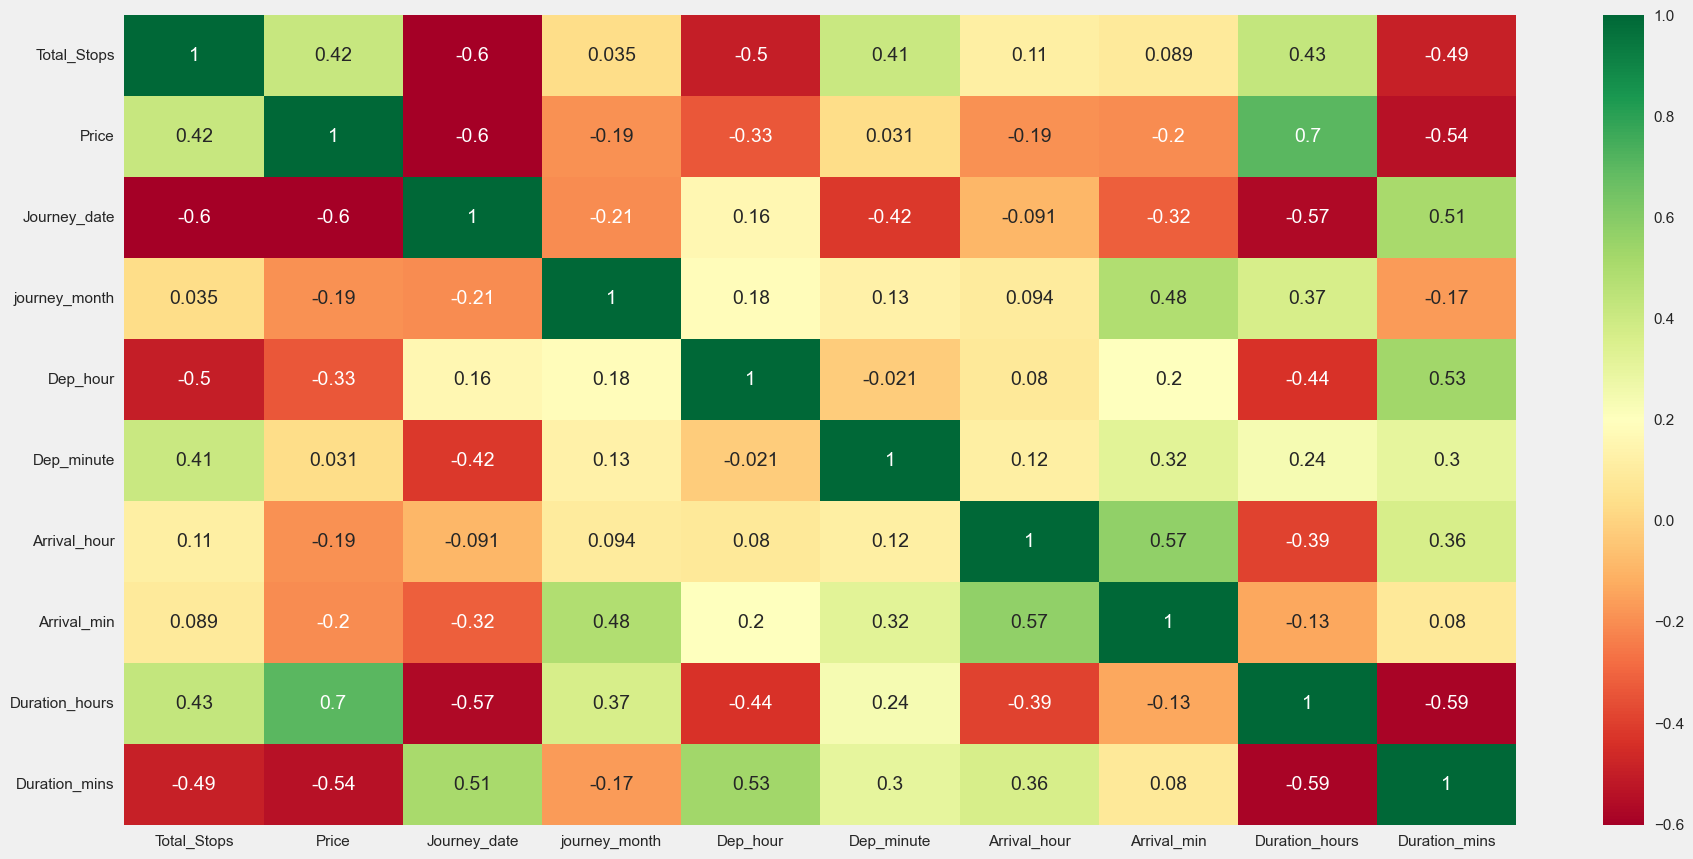

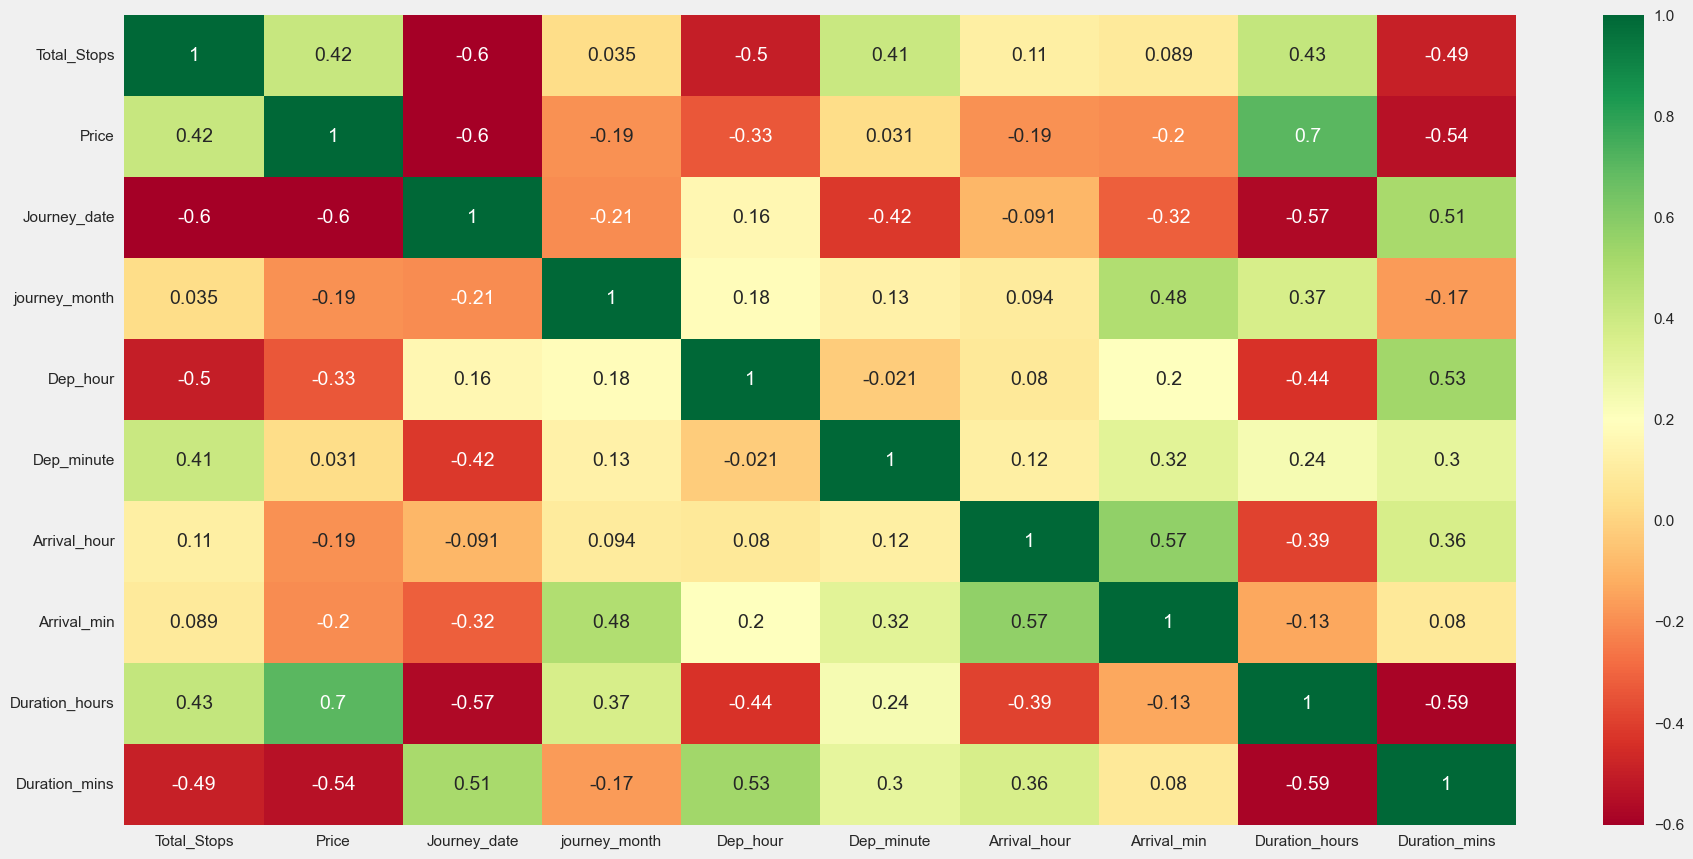

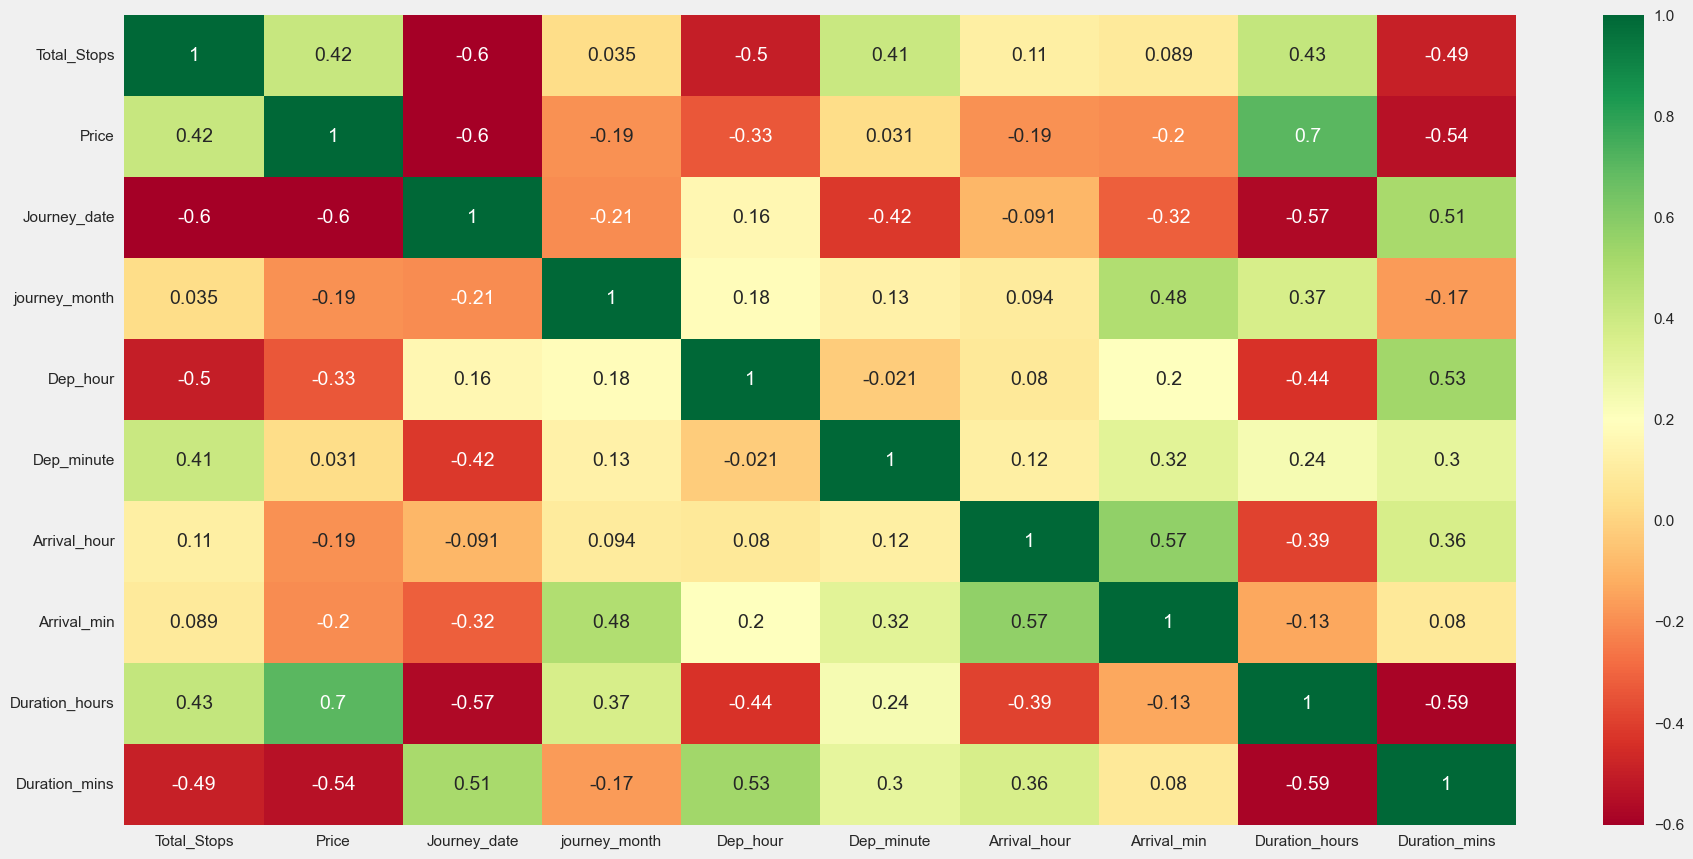

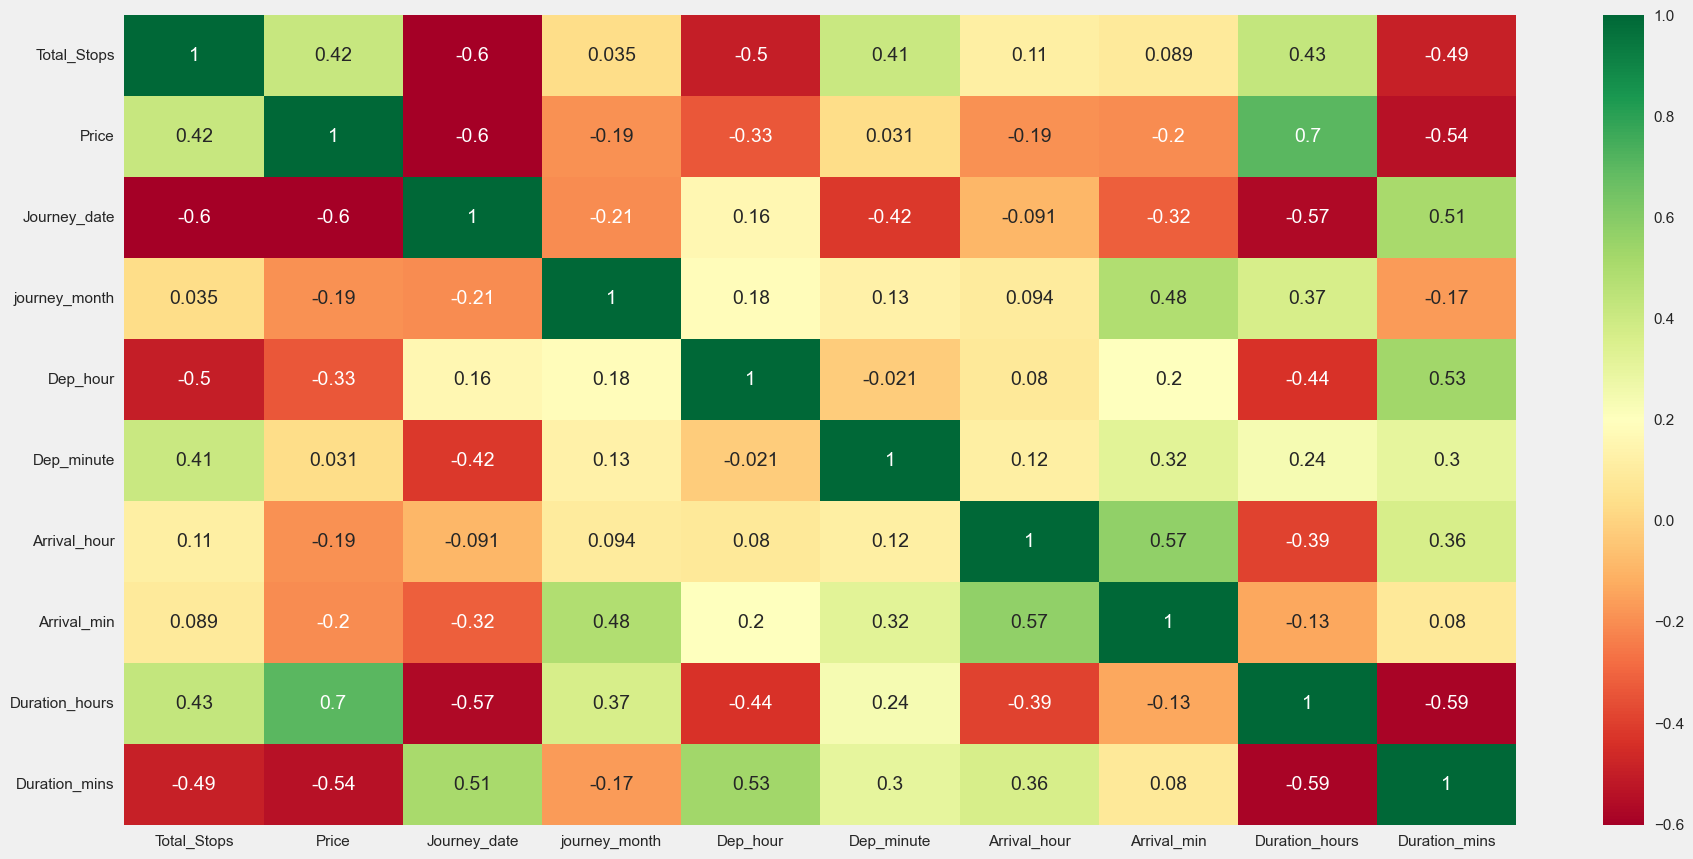

<Figure size 2000x1500 with 0 Axes>

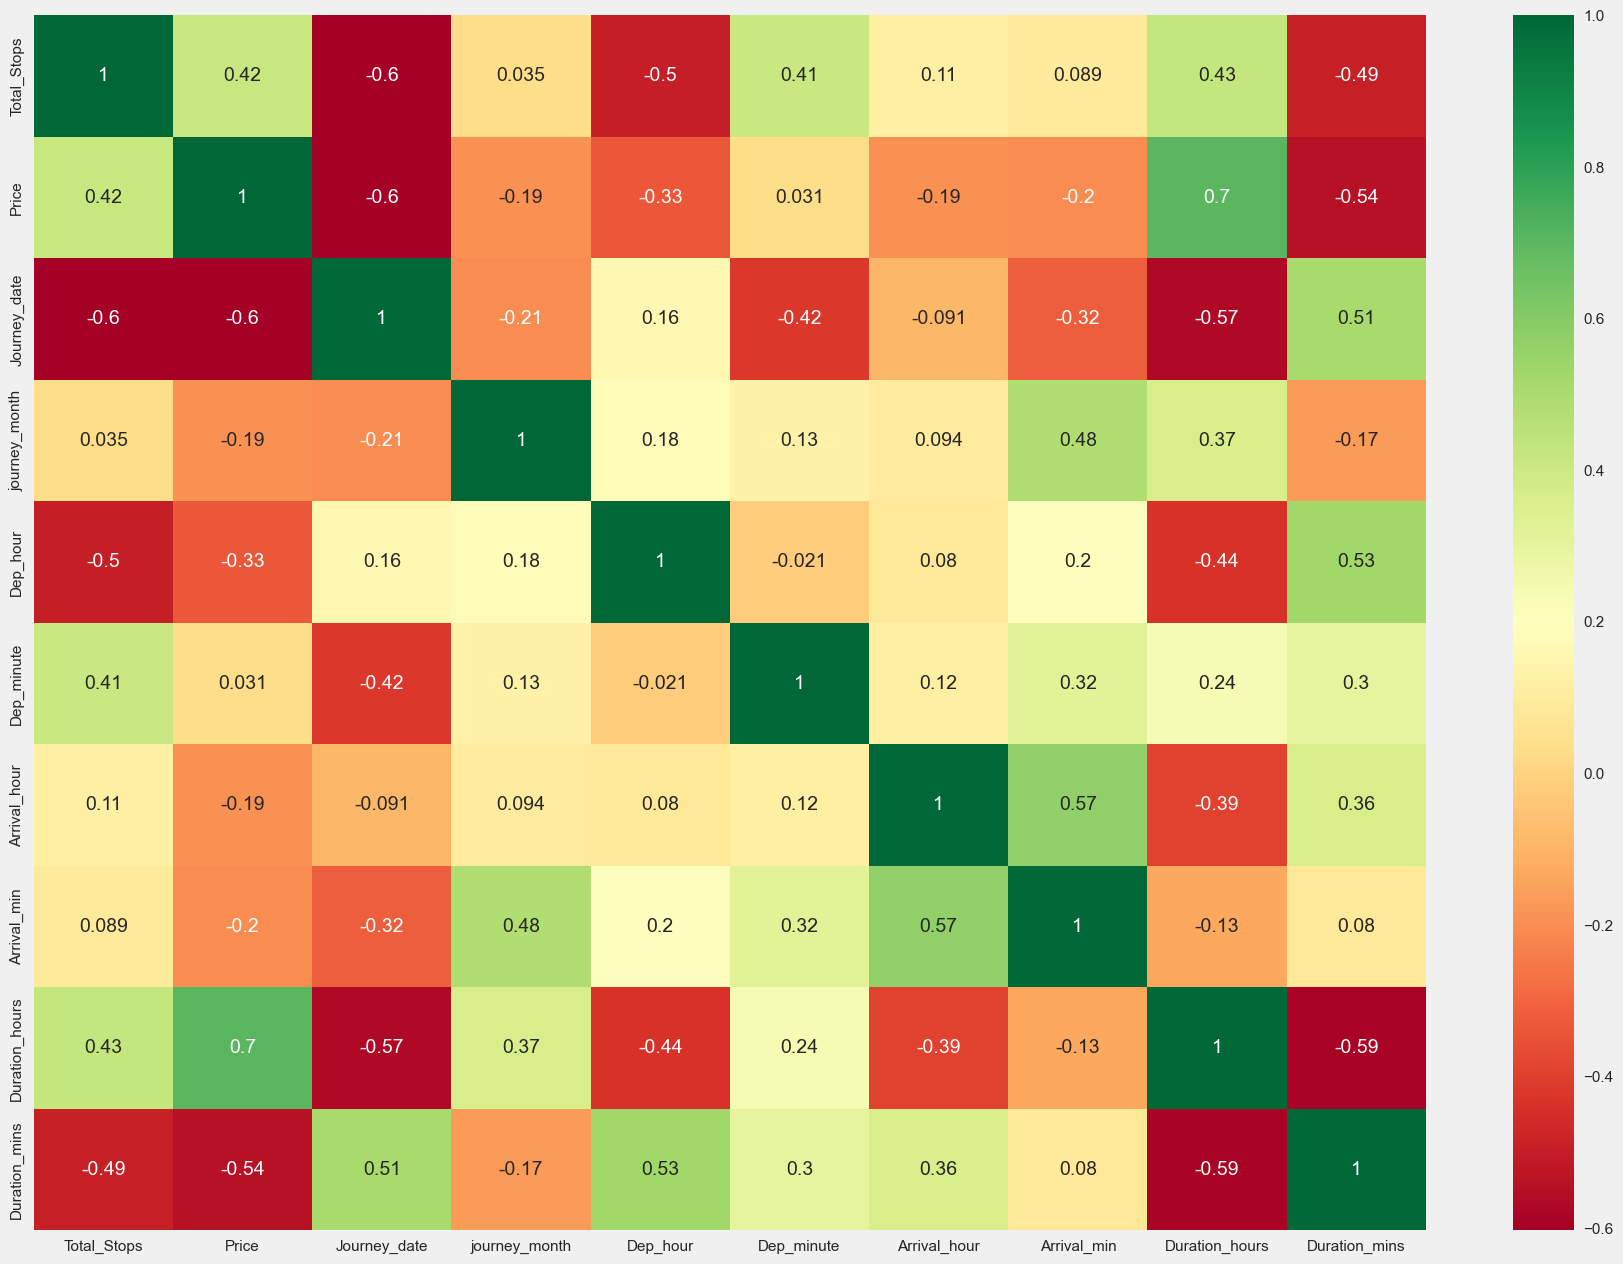

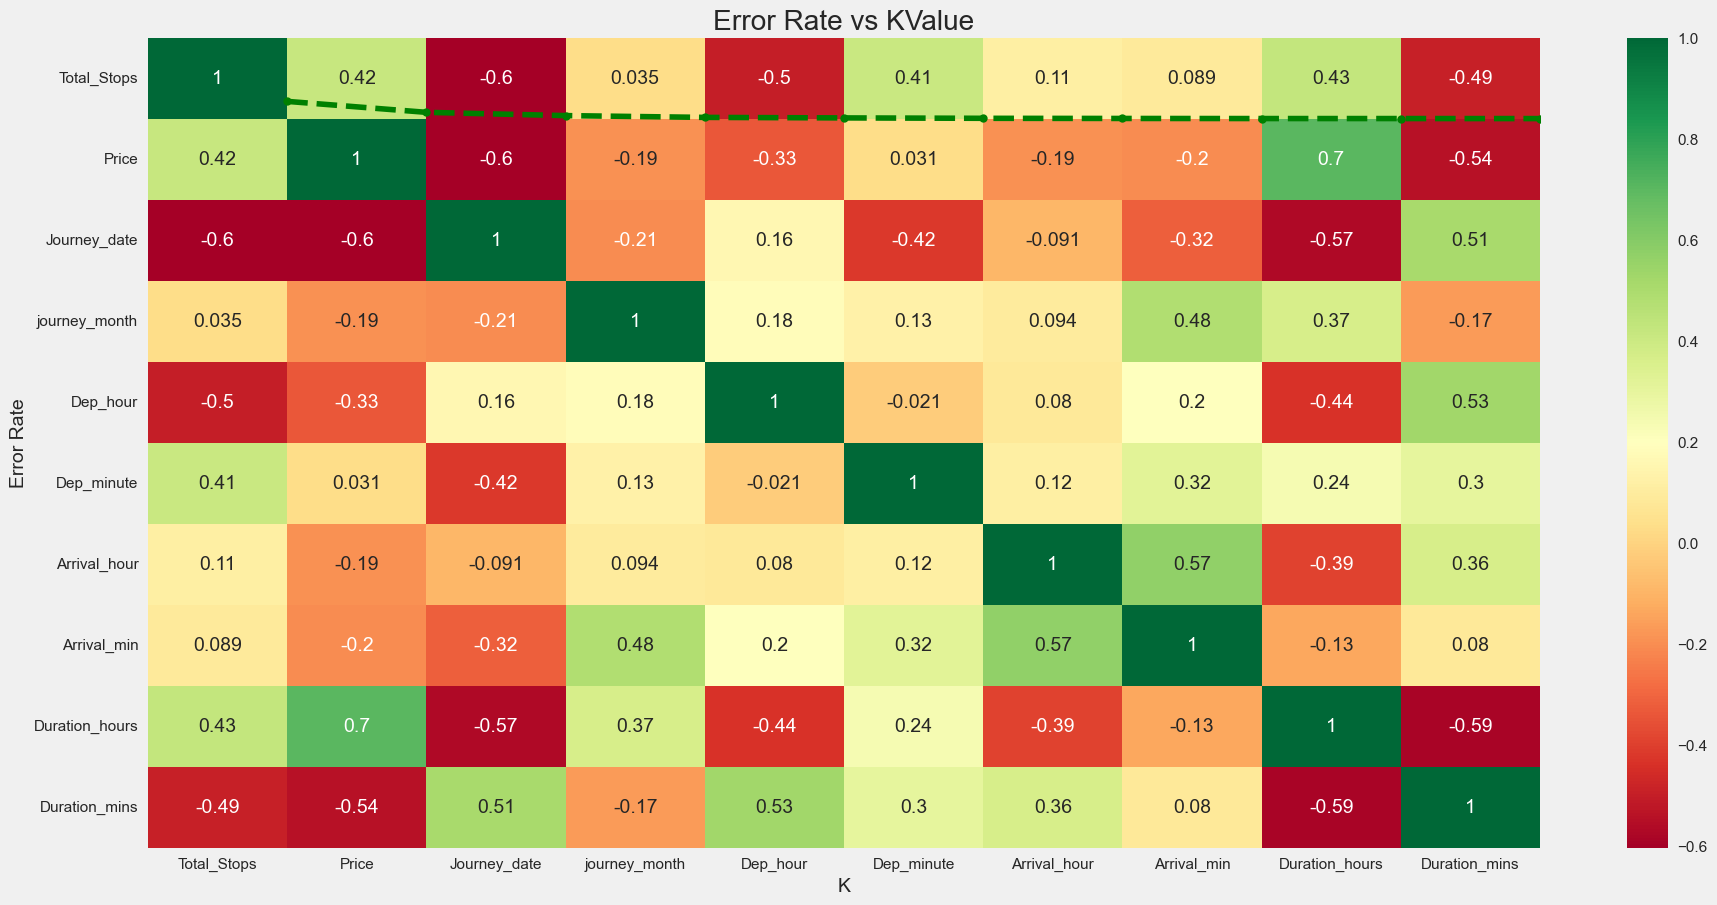

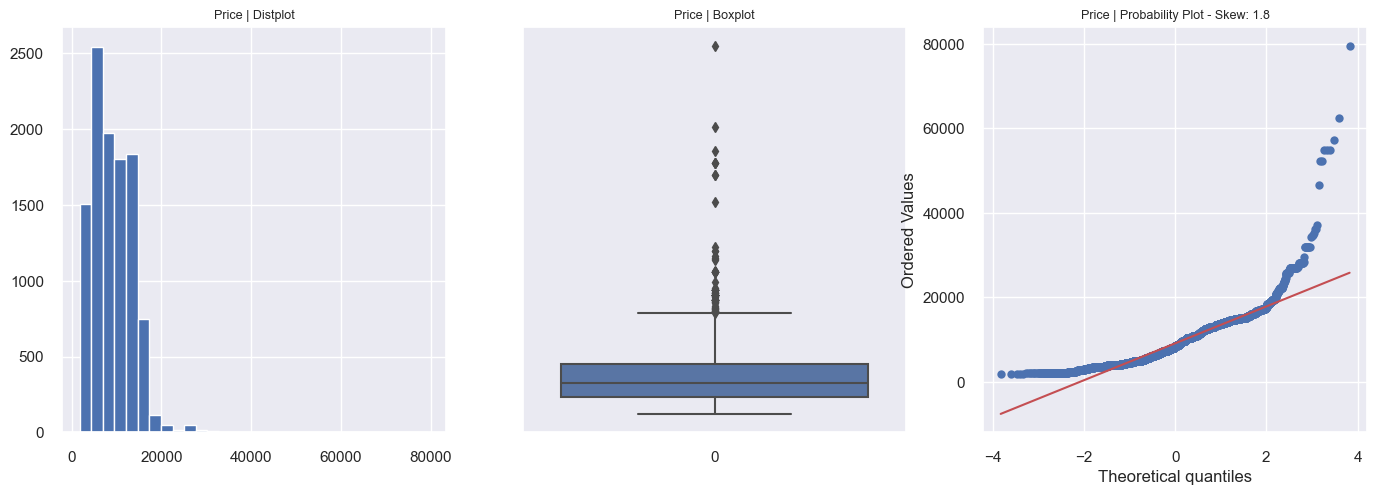

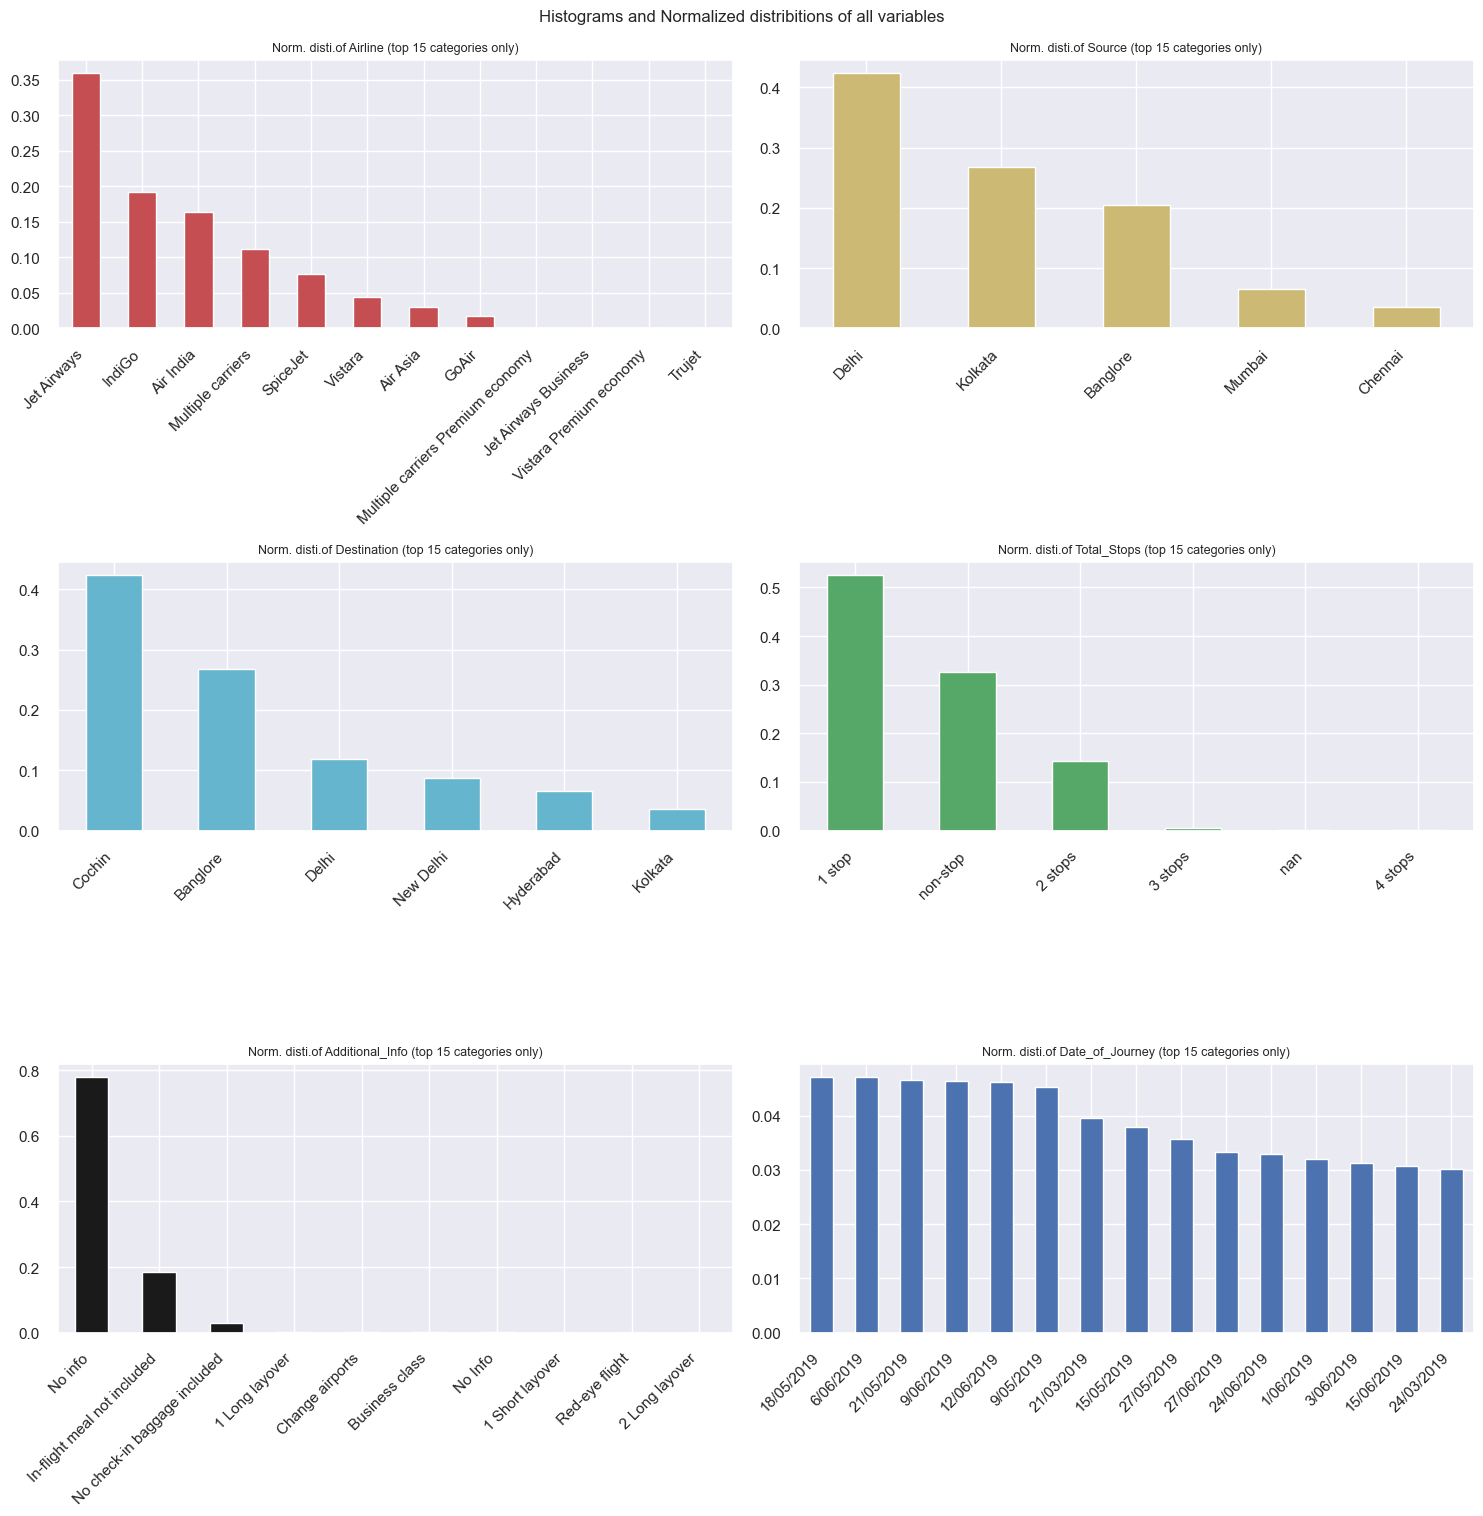

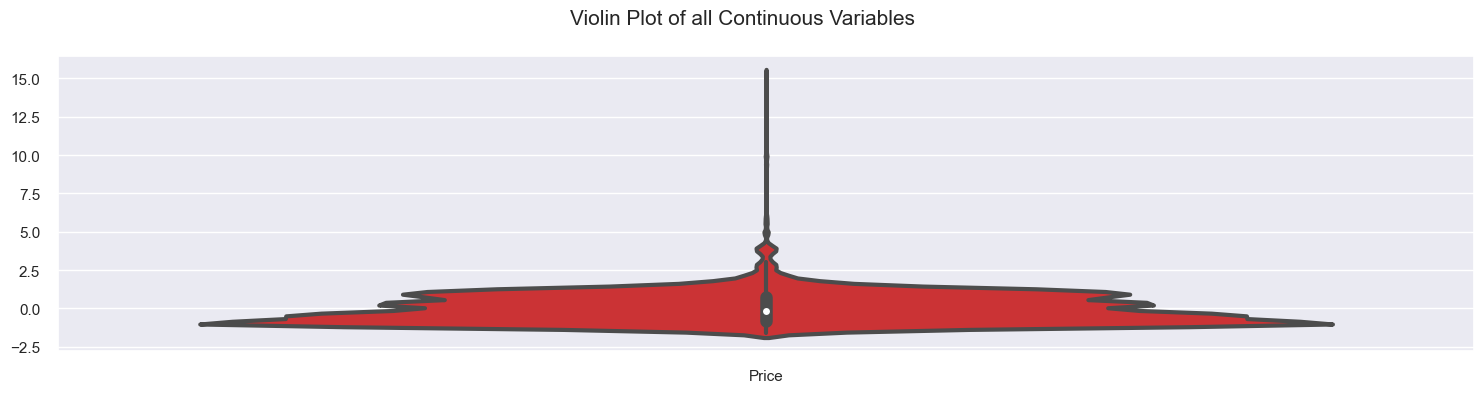

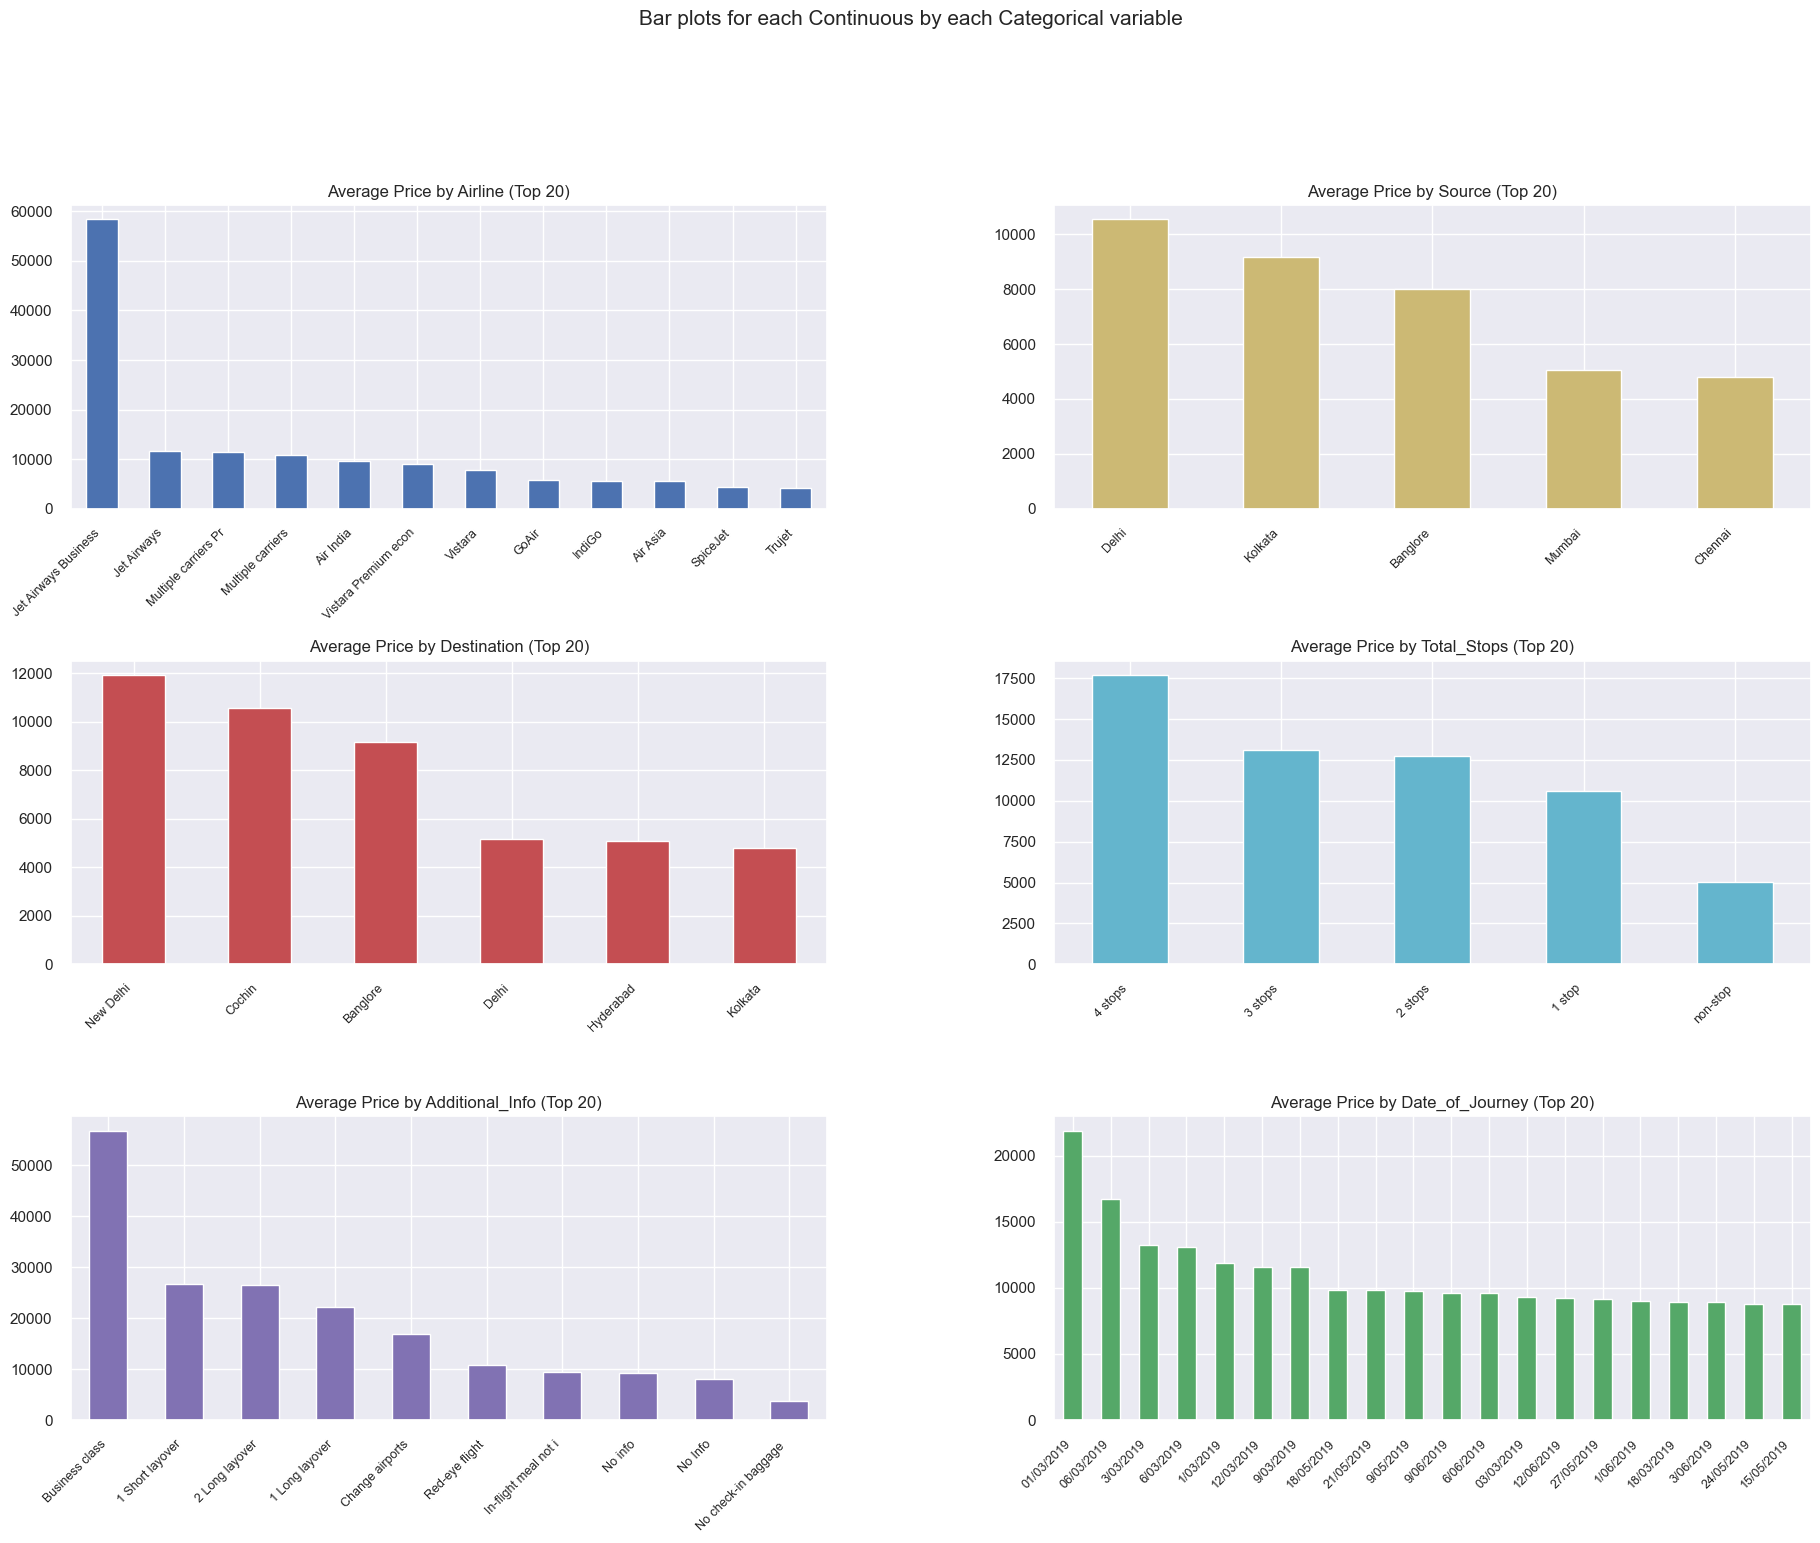

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

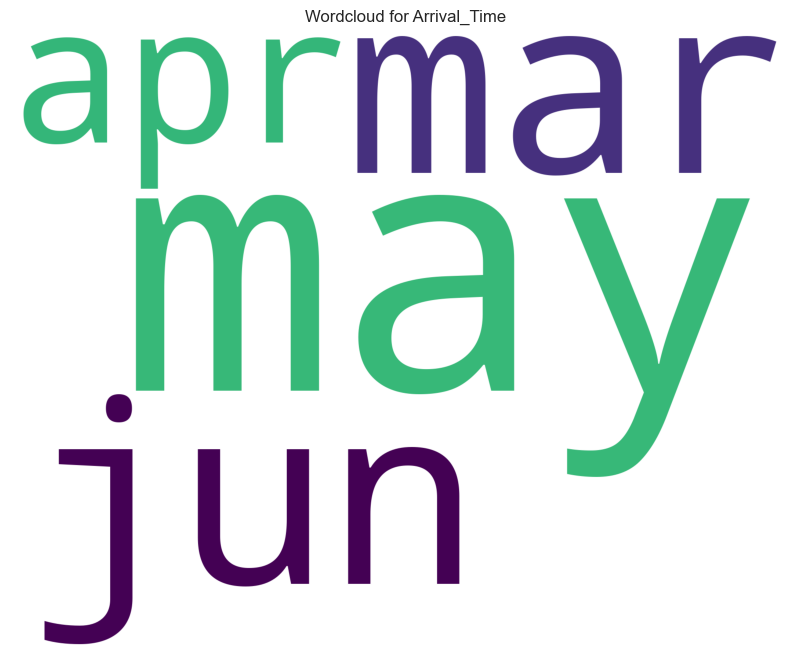

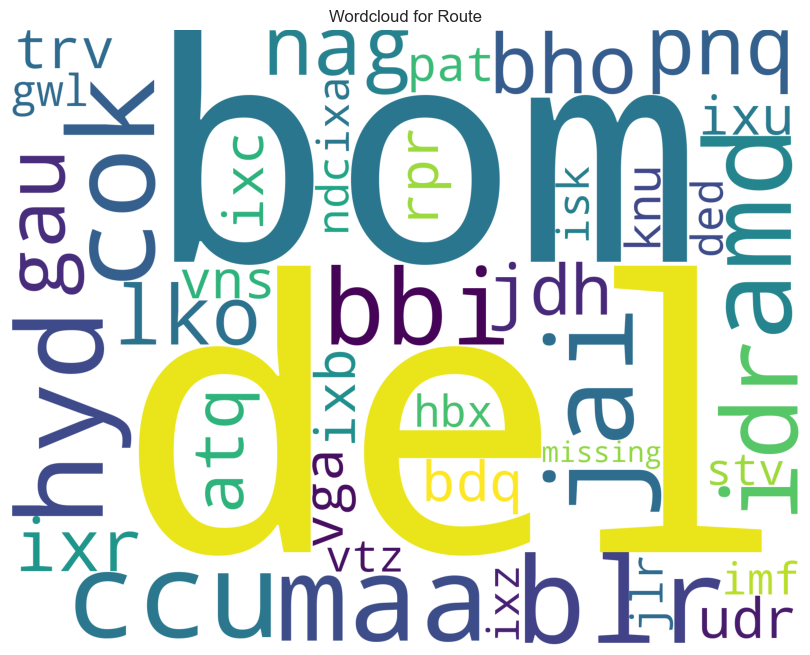

Could not draw wordcloud plot for Dep_Time


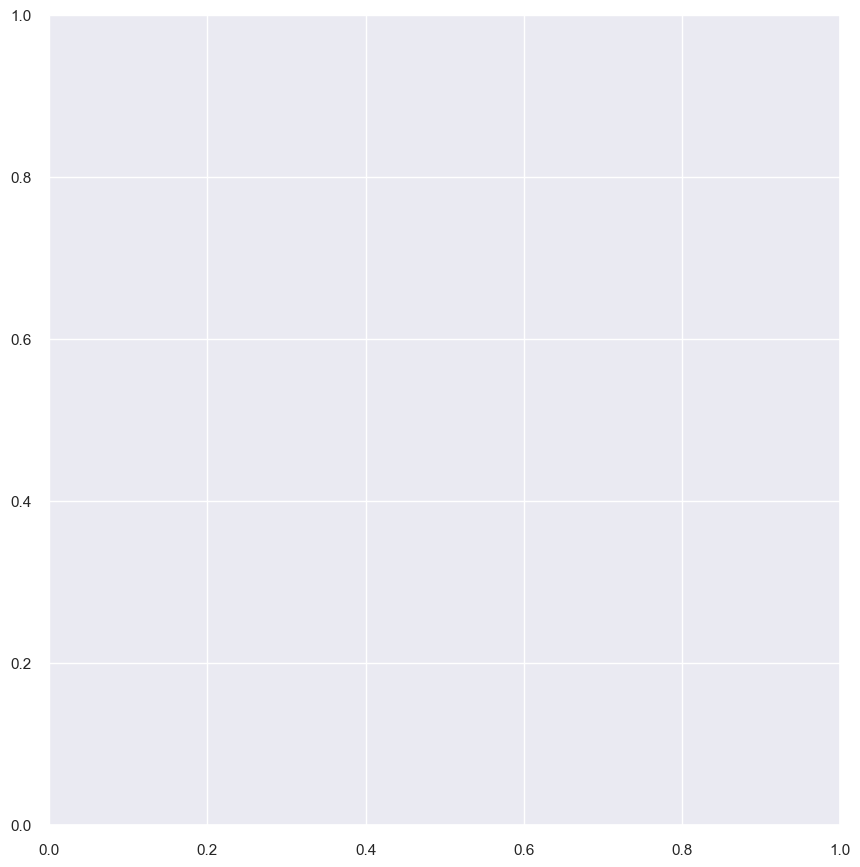

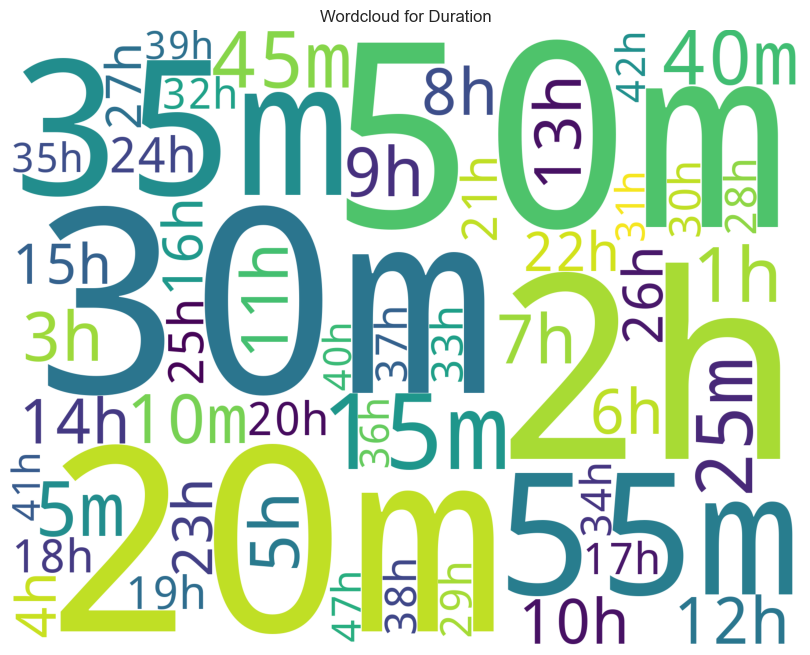

All Plots done
Time to run AutoViz = 34 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [112]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
av=AutoViz_Class()
data=av.AutoViz('Flight_Fare.xlsx')

In [22]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [23]:
data.dropna(inplace=True)

In [24]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [25]:
data['Journey_date']=pd.to_datetime(data['Date_of_Journey']).dt.day

In [26]:
data['journey_month']=pd.to_datetime(data['Date_of_Journey']).dt.month

In [27]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [28]:
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour

In [29]:
data['Dep_minute']=pd.to_datetime(data['Dep_Time']).dt.minute

In [30]:
data.drop(['Dep_Time'],axis=1,inplace=True)

In [31]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [33]:
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute
data.drop(['Arrival_Time'],axis=1,inplace=True)

KeyError: 'Arrival_Time'

In [34]:
# Assigning and converting Duration column into list to extract hours and minutes seperately

duration = list(data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" # Adds 0 minute
        else:
             duration[i] = "0h " + duration[i] # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [35]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins
data.drop(['Duration'],axis=1,inplace=True)

In [36]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


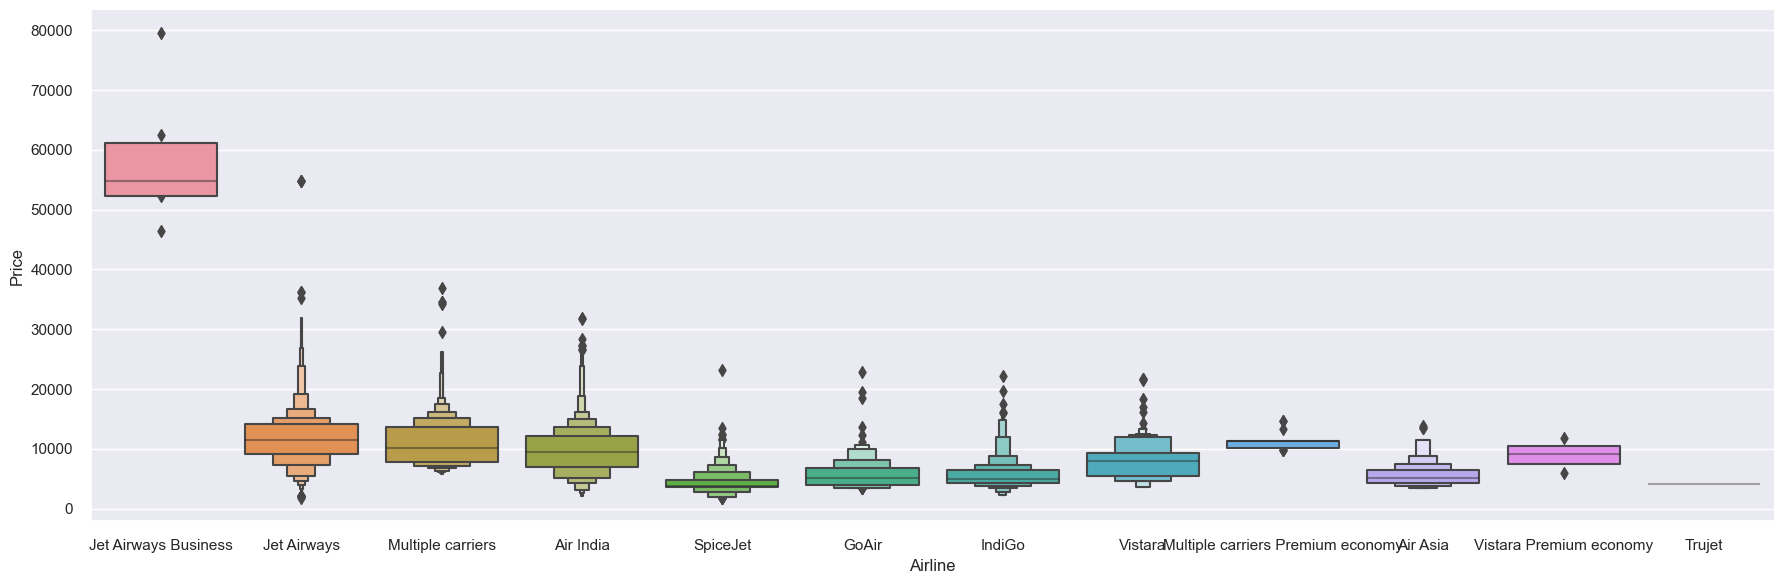

In [113]:
sns.catplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [38]:
data1=data.copy()

In [39]:
df1=pd.get_dummies(data1['Airline'],drop_first=True)
data1=pd.concat([data1,df1],axis=1).drop(['Airline'],axis=1)
data1

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0
10679,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0
10680,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0
10681,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0


In [40]:
df2=pd.get_dummies(data1['Source'],drop_first=True)
data1=pd.concat([data1,df1],axis=1).drop(['Source'],axis=1)

In [41]:
df3=pd.get_dummies(data1['Destination'],drop_first=True)
data1=pd.concat([data1,df1],axis=1).drop(['Destination'],axis=1)

In [42]:
data1.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [43]:
data1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [44]:
data1.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df=data1

In [45]:
df.head()

,Total_Stops,Price,Journey_date,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [46]:
x=df.drop('Price',axis=1)
x.head()

,Total_Stops,Journey_date,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [70]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
print(x)

[[0.         0.875      0.18181818 ... 0.         0.         0.        ]
 [0.5        0.08333333 0.         ... 0.         0.         0.        ]
 [0.5        0.125      0.72727273 ... 0.         0.         0.        ]
 ...
 [0.         1.         0.27272727 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.5        0.08333333 0.72727273 ... 0.         0.         0.        ]]


In [72]:
data1=df.iloc[0:10,0:10]
data1

,Total_Stops,Price,Journey_date,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,5,1,5,50,13,15,7,25
2,2,13882,6,9,9,25,4,25,19,0
3,1,6218,5,12,18,5,23,30,5,25
4,1,13302,3,1,16,50,21,35,4,45
5,0,3873,24,6,9,0,11,25,2,25
6,1,11087,3,12,18,55,10,25,15,30
7,1,22270,3,1,8,0,5,5,21,5
8,1,11087,3,12,8,55,10,25,25,30
9,1,8625,27,5,11,25,19,15,7,50


In [73]:
data1.corr()

,Total_Stops,Price,Journey_date,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Total_Stops,1.000000,0.415321,-0.602731,0.035215,-0.502264,0.405355,0.112469,0.088946,0.430101,-0.490055
Price,0.415321,1.000000,-0.597902,-0.190569,-0.333911,0.031325,-0.193463,-0.203835,0.703591,-0.542767
Journey_date,-0.602731,-0.597902,1.000000,-0.207890,0.159403,-0.420447,-0.091020,-0.316447,-0.570827,0.507399
journey_month,0.035215,-0.190569,-0.207890,1.000000,0.183946,0.127692,0.093786,0.483614,0.365154,-0.168430
Dep_hour,-0.502264,-0.333911,0.159403,0.183946,1.000000,-0.020904,0.080281,0.201823,-0.438518,0.528181
Dep_minute,0.405355,0.031325,-0.420447,0.127692,-0.020904,1.000000,0.116379,0.322526,0.239471,0.304109
Arrival_hour,0.112469,-0.193463,-0.091020,0.093786,0.080281,0.116379,1.000000,0.573010,-0.393844,0.362001
Arrival_min,0.088946,-0.203835,-0.316447,0.483614,0.201823,0.322526,0.573010,1.000000,-0.134939,0.080203
Duration_hours,0.430101,0.703591,-0.570827,0.365154,-0.438518,0.239471,-0.393844,-0.134939,1.000000,-0.585949
Duration_mins,-0.490055,-0.542767,0.507399,-0.168430,0.528181,0.304109,0.362001,0.080203,-0.585949,1.000000


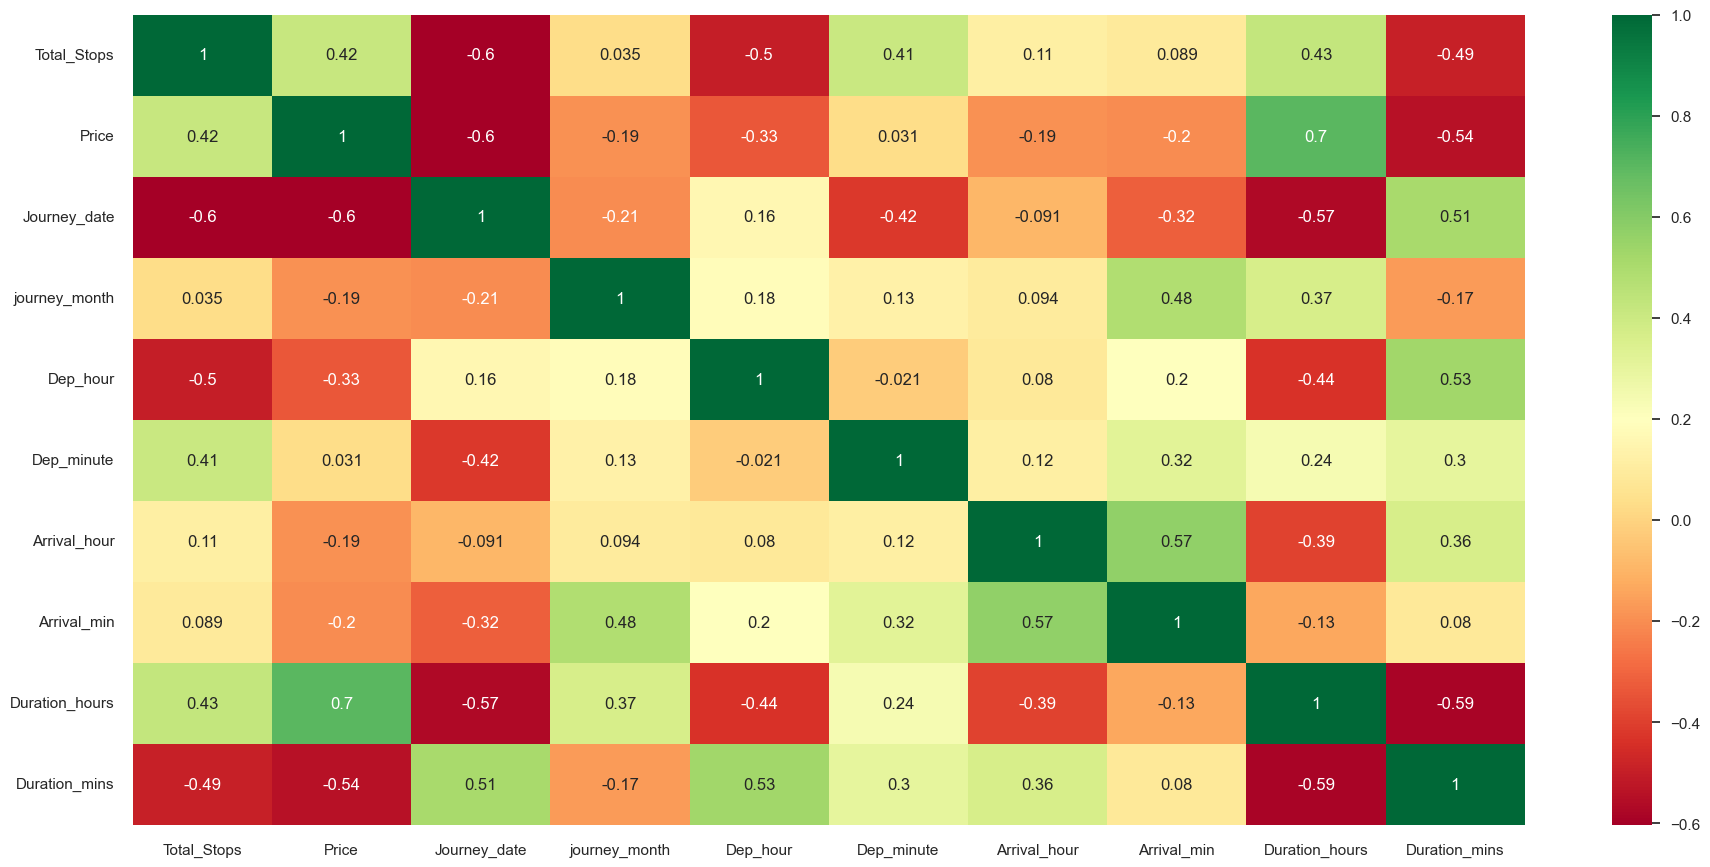

In [114]:
plt.figure(figsize=(20, 10))
sns.heatmap(data1.corr(), annot=True, cmap='RdYlGn')
plt.tick_params(labelsize=11)
plt.show()

In [115]:
x=df.drop('Price',axis=1)
y=df['Price']

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [117]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8011, 42)
(8011,)
(2671, 42)
(2671,)


In [118]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [119]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [120]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

8799978.114596164
2056.301202971438


In [121]:
import math
rmse=math.sqrt(mae)
print(rmse)

45.34645744676687


In [122]:
lr_score=r2_score(y_test,y_pred)
lr_score

0.5730865552733515

In [123]:
adj_r2=1-(1-lr_score)*(2671-1)/(2671-13-1)
adj_r2

0.5709977804214711

In [124]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [125]:
(y_test!=y_pred).sum()

2649

In [126]:
len(y_test)

2671

In [127]:
(y_test!=y_pred).sum()/len(y_test)

0.9917633845001872

In [128]:
ERROR_RATE=[]
for i in range(1,13):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    error_rate=(y_test!=y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [129]:
ERROR_RATE

[0.7877199550730064,
 0.9228753275926619,
 0.9633096218644702,
 0.9853987270685136,
 0.9917633845001872,
 0.9966304754773493,
 0.9985024335454886,
 0.9996256083863722,
 0.9996256083863722,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'Error Rate')

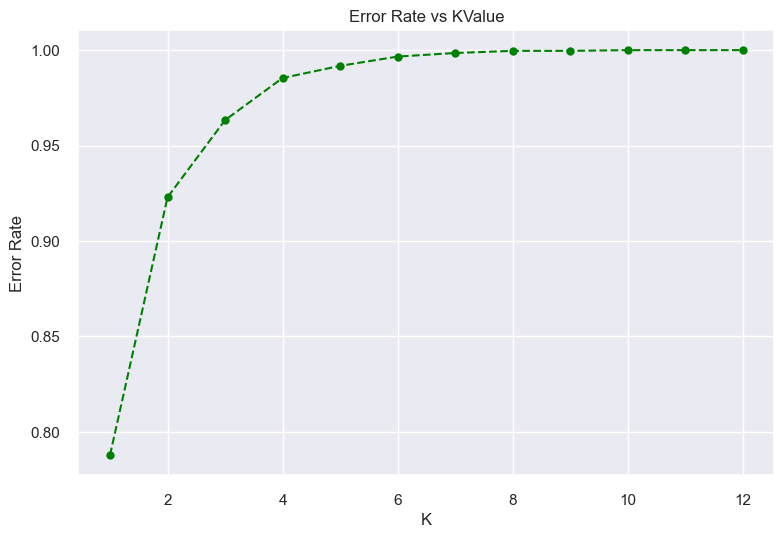

In [130]:
plt.plot(range(1,13),ERROR_RATE,color='green',marker='o',linestyle='--')
plt.title('Error Rate vs KValue')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [131]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [132]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

8874709.00224635
1881.0456757768627


In [133]:
knn_score=r2_score(y_test,y_pred)
knn_score

0.5694611348167593

In [134]:
adj_r2=1-(1-knn_score)*(2671-1)/(2671-13-1)
adj_r2

0.5673546217390845

In [135]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()#object creation for decision tree
dt.fit(x_train,y_train)#training the model
y_pred=dt.predict(x_test)#prediction

In [136]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

6249071.193466242
1376.8848121802073


In [137]:
dt_score=r2_score(y_test,y_pred)
dt_score

0.6968387335964222

In [138]:
adj_r2=1-(1-dt_score)*(2671-1)/(2671-13-1)
adj_r2

0.6953554455033675

In [139]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [140]:
mse=mean_squared_error(y_test,y_pred)
print(mse) 
mae=mean_absolute_error(y_test,y_pred)
print(mae)

4447544.172768201
1206.6900737631165


In [141]:
RMSE=np.sqrt(mse)
RMSE

2108.920143762727

In [142]:
r2=r2_score(y_test,y_pred)
r2

0.7842362357446002

In [143]:
adj_r2=1-(1-r2)*(2671-1)/(2671-13-1)
adj_r2

0.7831805605713521

In [144]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
n_estimators=[int(x)for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split=[2,3,10,15,100]
min_samples_leaf=[1,2,5,10]

In [146]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

In [147]:
rf_random=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [148]:
rf_random.fit(x_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [149]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [151]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators=500,
min_samples_split= 10,
min_samples_leaf= 1,
max_features= 'auto',
max_depth= 20)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [152]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1168.097220918369

In [153]:
MSE=mean_squared_error(y_test,y_pred)
MSE

4092300.119683597

In [154]:
RMSE=np.sqrt(MSE)
RMSE

2022.9434296795343

In [155]:
random_forest.score(x_train,y_train)

0.9098019179919663

In [156]:
random_forest.score(x_test,y_test)

0.8014701947892772

In [158]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [159]:
rf_score=metrics.r2_score(y_test,y_pred)
rf_score

0.8014701947892772

In [160]:
prediction=rf_random.predict(x_test)

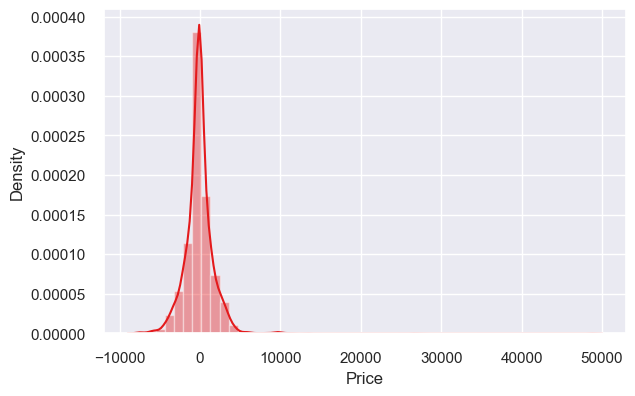

In [161]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-prediction)
plt.show()

In [163]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(n_estimators=100)
gbm.fit(x_train,y_train)
y_hat=gbm.predict(x_test)

In [168]:
mse=mean_squared_error(y_test,y_hat)
mse

4471265.527407108

In [165]:
mae=mean_absolute_error(y_test,y_hat)
mae

1505.6956755650679

In [166]:
gb_score=r2_score(y_test,y_hat)
gb_score

0.7830854413800459

In [167]:
adj_r2=1-(1-gb_score)*(2671-1)/(2671-13-1)
adj_r2

0.7820241356735876

In [169]:
from sklearn.model_selection import RandomizedSearchCV

param_grid={'n_estimators':[100,200,300],
           'learning_rate':[0.01,0.1,0.2],
           'max_depth':[3,4,5],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4],
           'subsample':[0.8,0.9,1.0]}

In [170]:
gb_regressor = GradientBoostingRegressor()

In [171]:
rsc=RandomizedSearchCV(estimator=gb_regressor,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [172]:
rsc.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [173]:
rsc.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'learning_rate': 0.1}

In [174]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost=GradientBoostingRegressor(n_estimators= 300,
                                         min_samples_split= 10,
                                         min_samples_leaf= 2,
                                         subsample= 0.9,
                                         learning_rate= 0.1,
                                         max_depth= 5)
gradient_boost.fit(x_train,y_train)
y_hat=gradient_boost.predict(x_test)


In [175]:
mse=mean_squared_error(y_test,y_hat)
mse

3544708.3993740547

In [176]:
mae=mean_absolute_error(y_test,y_hat)
mae

1219.237916663787

In [177]:
gbst_score=r2_score(y_test,y_hat)
gbst_score

0.8280355185408654

In [179]:
scores=[lr_score,knn_score,dt_score,rf_score,gbst_score]
algorithms = ["Linear Regression","KNN","Decision Tree","Random Forest","Gradient Boosting"]    
for i in range(len(algorithms)):
    print('R2 score achieved ' +algorithms[i]+' is: '+str(scores[i])+'%')

R2 score achieved Linear Regression is: 0.5730865552733515%
R2 score achieved KNN is: 0.5694611348167593%
R2 score achieved Decision Tree is: 0.6968387335964222%
R2 score achieved Random Forest is: 0.8014701947892772%
R2 score achieved Gradient Boosting is: 0.8280355185408654%


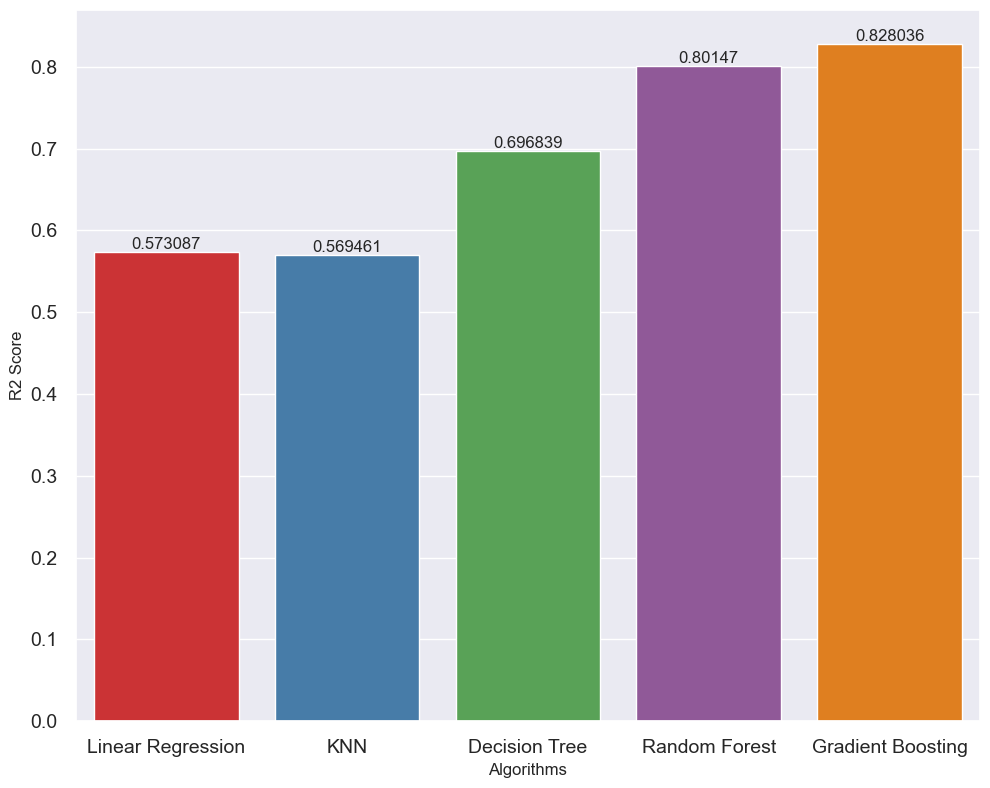

In [183]:
plt.figure(figsize=(10,8))
plt.xlabel('Algorithms')
plt.ylabel('R2 Score')
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)